
# Molecular EDA & Fingerprint PCA Notebook

본 노트북은 `train.csv`를 로드하여 다음을 시각화합니다.

1. 기본 통계 및 결측치 점검  
2. 핵심 수치형 변수(`MolWt`, `clogp`, `sa_score`, `qed`)의 분포/라벨별 비교  
3. 라벨별 상관관계(히트맵)  
4. Fingerprint 그룹(ECFP/PTFP/FCFP) 활성 피처 통계 및 라벨별 분포  
5. ECFP/PTFP/FCFP 각각의 PCA(2D) 시각화

> **주의:** 이 노트북은 시각화에 **matplotlib**만 사용합니다.


In [2]:
%pip install matplotlib pandas seaborn numpy scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 50.3 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.8 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [kiwisolver]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttoo

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 파일 로드
df = pd.read_csv('train.csv')

# 핵심 컬럼 목록
core_features = ['MolWt', 'clogp', 'sa_score', 'qed', 'label']

# fingerprint 컬럼
ecfp_cols = [c for c in df.columns if c.startswith('ecfp_')]
ptfp_cols = [c for c in df.columns if c.startswith('ptfp_')]
fcfp_cols = [c for c in df.columns if c.startswith('fcfp_')]

len(df), len(df.columns), len(ecfp_cols), len(ptfp_cols), len(fcfp_cols)


(8349, 3078, 1024, 1024, 1024)

## 1) 기본 점검: 정보/통계/결측치

In [4]:

# 정보
print(df.info())

# 기본 통계
display(df[core_features].describe())

# 결측치
display(df.isnull().sum().sort_values(ascending=False).head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Columns: 3078 entries, SMILES to label
dtypes: float64(4), int64(3073), object(1)
memory usage: 196.1+ MB
None


,MolWt,clogp,sa_score,qed,label
count,8349.000000,8349.000000,8349.000000,8349.000000,8349.000000
mean,443.248753,3.794829,3.187613,0.559151,0.544017
std,88.876374,1.379045,0.727768,0.185664,0.498089
min,94.117000,-4.048930,1.282432,0.024365,0.000000
25%,383.879000,2.874500,2.663425,0.425440,0.000000
50%,441.522000,3.735100,3.093155,0.556410,1.000000
75%,495.639000,4.652500,3.593547,0.700506,1.000000
max,1242.488000,9.429480,7.309297,0.947494,1.000000


SMILES       0
fcfp_899     0
fcfp_1021    0
fcfp_1022    0
fcfp_1023    0
ptfp_0       0
ptfp_1       0
ptfp_2       0
ptfp_3       0
ptfp_4       0
ptfp_5       0
ptfp_6       0
ptfp_7       0
ptfp_8       0
ptfp_9       0
ptfp_10      0
ptfp_11      0
ptfp_12      0
ptfp_13      0
ptfp_14      0
dtype: int64

## 2) 핵심 수치형 변수 분포 (히스토그램)

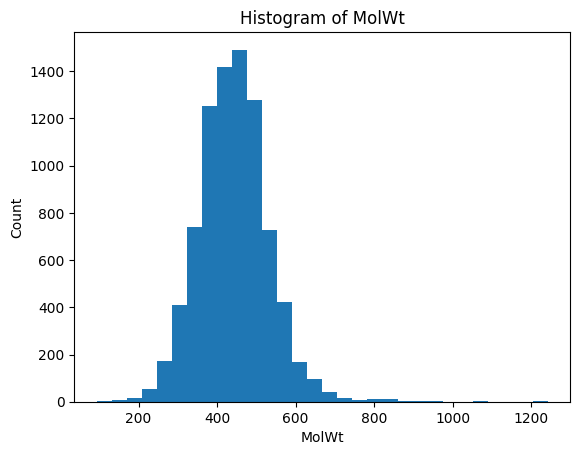

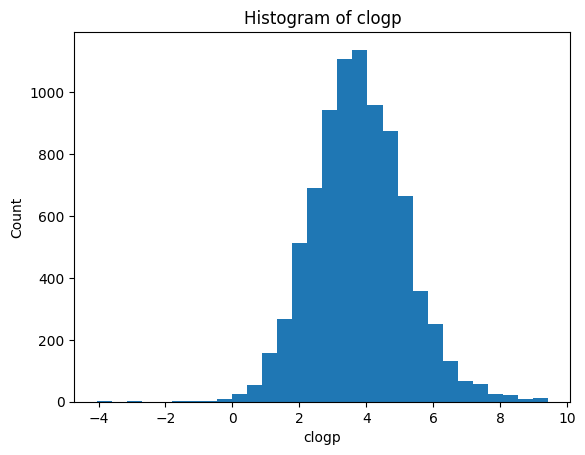

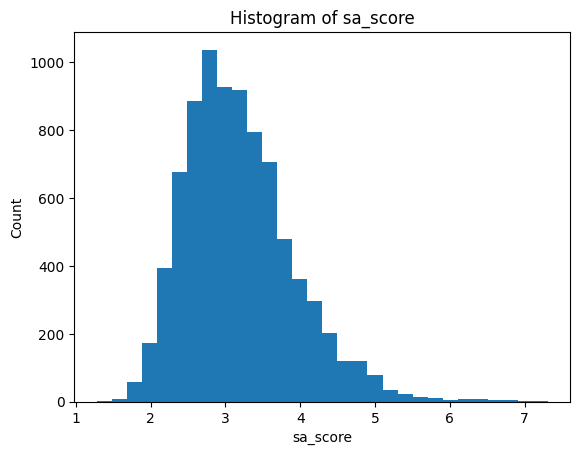

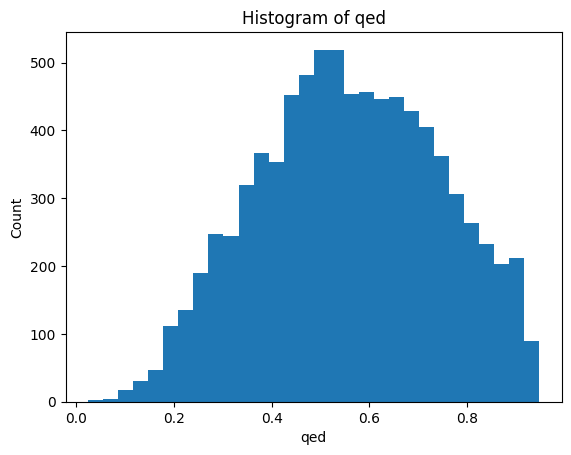

In [5]:

for col in ['MolWt', 'clogp', 'sa_score', 'qed']:
    plt.figure()
    plt.hist(df[col].dropna().values, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Count')
    plt.show()


## 3) 라벨별 Boxplot

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7624\1624432545.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)


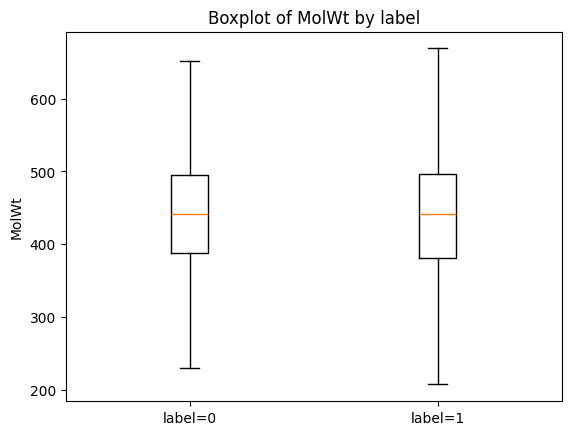

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7624\1624432545.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)


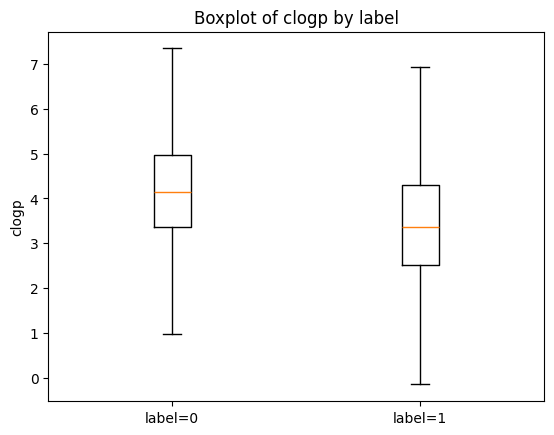

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7624\1624432545.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)


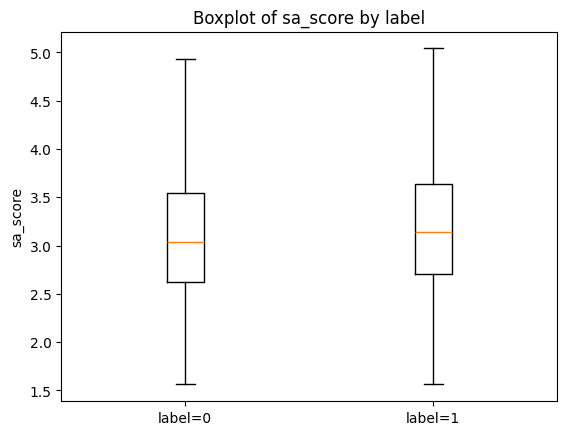

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7624\1624432545.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)


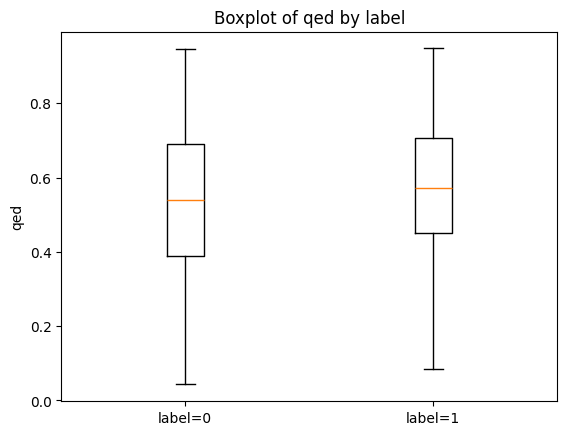

In [6]:

for col in ['MolWt', 'clogp', 'sa_score', 'qed']:
    plt.figure()
    data0 = df.loc[df['label']==0, col].dropna().values
    data1 = df.loc[df['label']==1, col].dropna().values
    plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)
    plt.title(f'Boxplot of {col} by label')
    plt.ylabel(col)
    plt.show()


## 4) 라벨별 상관관계 (히트맵)

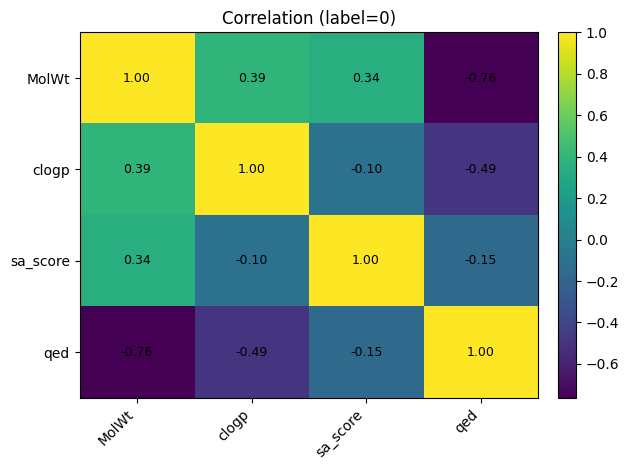

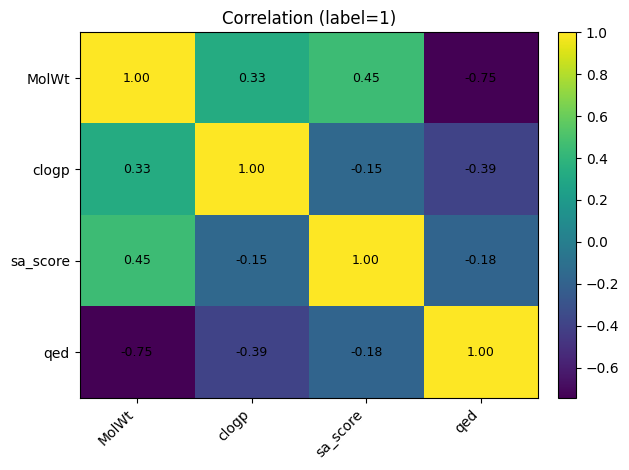

In [7]:

def corr_heatmap(df_sub, title):
    corr = df_sub[['MolWt','clogp','sa_score','qed']].corr(numeric_only=True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(corr.values, aspect='auto')
    ax.set_xticks(range(corr.shape[1])); ax.set_yticks(range(corr.shape[0]))
    ax.set_xticklabels(corr.columns, rotation=45, ha='right')
    ax.set_yticklabels(corr.index)
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.values[i,j]:.2f}", ha='center', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

corr_heatmap(df[df['label']==0], 'Correlation (label=0)')
corr_heatmap(df[df['label']==1], 'Correlation (label=1)')


## 5) 라벨 분포

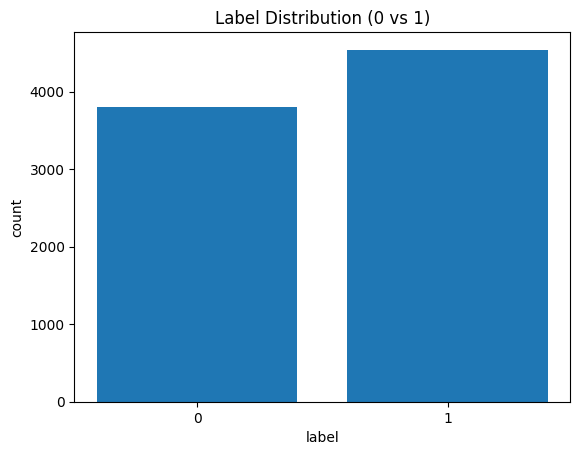

label
0    3807
1    4542
Name: count, dtype: int64

In [8]:

counts = df['label'].value_counts().sort_index()
plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title('Label Distribution (0 vs 1)')
plt.xlabel('label'); plt.ylabel('count')
plt.show()
counts


## 6) Fingerprint 활성 피처 수 계산 (row 단위)

In [9]:

df['ecfp_active_per_row'] = df[ecfp_cols].sum(axis=1) if len(ecfp_cols)>0 else 0
df['ptfp_active_per_row'] = df[ptfp_cols].sum(axis=1) if len(ptfp_cols)>0 else 0
df['fcfp_active_per_row'] = df[fcfp_cols].sum(axis=1) if len(fcfp_cols)>0 else 0

df[['ecfp_active_per_row','ptfp_active_per_row','fcfp_active_per_row']].describe()


,ecfp_active_per_row,ptfp_active_per_row,fcfp_active_per_row
count,8349.000000,8349.000000,8349.000000
mean,56.155827,433.708468,44.902024
std,10.983447,89.312612,9.365814
min,10.000000,81.000000,9.000000
25%,49.000000,378.000000,39.000000
50%,56.000000,436.000000,45.000000
75%,64.000000,489.000000,51.000000
max,105.000000,835.000000,84.000000


## 7) Fingerprint 활성 피처 수 분포 (히스토그램)

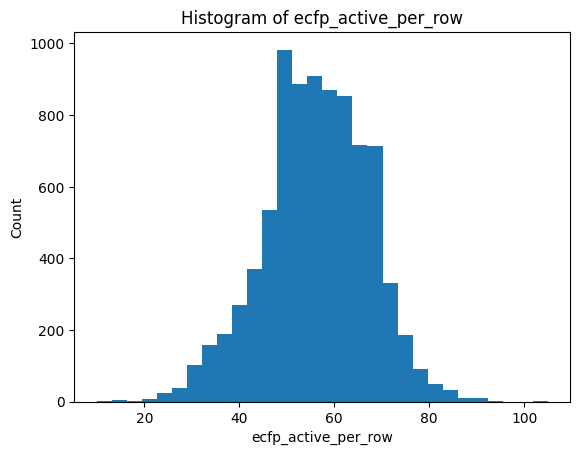

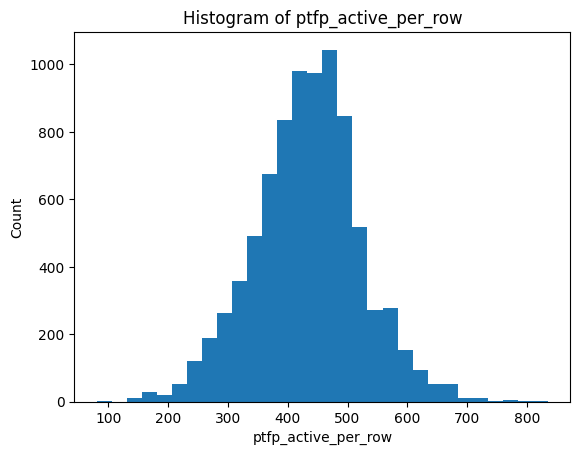

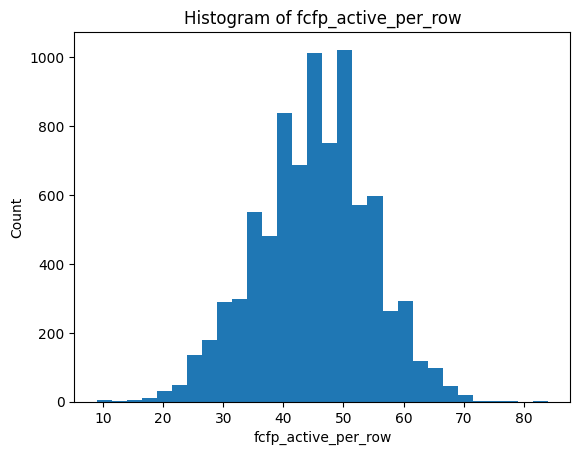

In [10]:

for col in ['ecfp_active_per_row','ptfp_active_per_row','fcfp_active_per_row']:
    plt.figure()
    plt.hist(df[col].values, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Count')
    plt.show()


## 8) Fingerprint 활성 피처 수 라벨별 Boxplot

In [ ]:

for col in ['ecfp_active_per_row','ptfp_active_per_row','fcfp_active_per_row']:
    plt.figure()
    data0 = df.loc[df['label']==0, col].values
    data1 = df.loc[df['label']==1, col].values
    plt.boxplot([data0, data1], labels=['label=0','label=1'], showfliers=False)
    plt.title(f'Boxplot of {col} by label')
    plt.ylabel(col)
    plt.show()


## 9) ECFP / PTFP / FCFP PCA (2D)

In [ ]:

def pca_scatter(X, labels, title):
    scaler = StandardScaler(with_mean=False)
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure()
    for lab in sorted(np.unique(labels)):
        idx = (labels == lab)
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], s=10, alpha=0.8, label=f'label={lab}')
    plt.title(f"{title} (Explained Variance: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f})")
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend()
    plt.show()

labels = df['label'].values.astype(int)

if len(ecfp_cols)>0:
    X = df[ecfp_cols].values
    pca_scatter(X, labels, 'ECFP PCA')

if len(ptfp_cols)>0:
    X = df[ptfp_cols].values
    pca_scatter(X, labels, 'PTFP PCA')

if len(fcfp_cols)>0:
    X = df[fcfp_cols].values
    pca_scatter(X, labels, 'FCFP PCA')
